### Introducción a Redes Neuronales

Las redes neuronales son un tipo de modelo de aprendizaje automático inspirado en el funcionamiento del cerebro humano. Se utilizan en tareas como reconocimiento de imágenes, procesamiento de lenguaje natural y predicción de datos.

¿Cómo funcionan?

Una red neuronal está compuesta por neuronas artificiales, organizadas en capas:
- Capa de entrada: Recibe los datos de entrada.
- Capas ocultas: Procesan la información aplicando transformaciones matemáticas.
- Capa de salida: Genera el resultado final del modelo.
Cada neurona realiza una operación matemática sobre los datos y los pasa a la siguiente capa.

#### Componentes principales

- Neuronas: Unidades básicas que procesan información.
- Pesos (weights): Valores que determinan la importancia de cada conexión entre neuronas.
- Función de activación: Aplica una transformación no lineal a la salida de cada neurona.
- Propagación hacia adelante (forward propagation): Proceso de pasar los datos de entrada a la salida.
- Retropropagación (backpropagation): Algoritmo de ajuste de pesos para minimizar el error.

#### Tipos de Redes Neuronales

- Perceptrón: Modelo más básico, con una sola capa.
- Redes Neuronales Artificiales (ANN): Varias capas ocultas, utilizadas en diversas aplicaciones.
- Redes Neuronales Convolucionales (CNN): Especializadas en procesamiento de imágenes.
- Redes Neuronales Recurrentes (RNN): Ideales para datos secuenciales, como texto o series temporales.


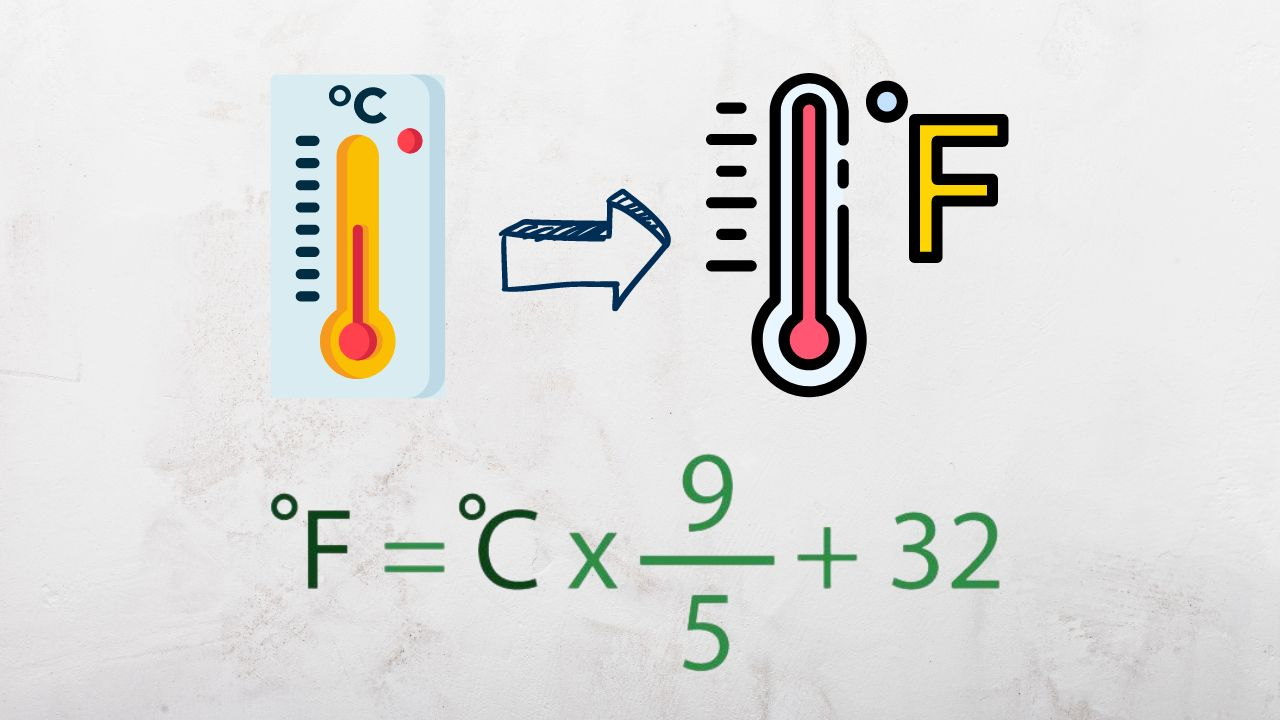

In [7]:
c=5
f = 5 * (9/5)  + 32
print(f)

41.0


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

celsius = np.array([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 100], dtype=float)
fahrenheit = np.array([-40, -22, -4, 14, 32, 50, 68, 86, 104, 122, 140, 212], dtype=float)

model = Sequential([
    Dense(2, input_shape=[1], activation='relu'),
    #Dense(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(celsius, fahrenheit, epochs=5, verbose=1)

x_input = np.array([[25]])  # Si el modelo espera 1 característica
prediction = model.predict(x_input)
print(prediction)


Epoch 1/5


c:\Users\CristiamAlbertoLoaiz\Documents\repositories_git\python-basics\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - loss: 6236.3491
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6216.2949
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 6196.2754
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6176.2930
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6156.3477
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[10.7169]]


In [13]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

In [14]:
model.weights

[<Variable path=sequential_7/dense_19/kernel, shape=(1, 2), dtype=float32, value=[[0.784936   0.41976193]]>,
 <Variable path=sequential_7/dense_19/bias, shape=(2,), dtype=float32, value=[ 0.00500532 -0.00499882]>,
 <Variable path=sequential_7/dense_20/kernel, shape=(2, 1), dtype=float32, value=[[ 1.0681012]
  [-0.9775168]]>,
 <Variable path=sequential_7/dense_20/bias, shape=(1,), dtype=float32, value=[0.00499925]>]

#### **Optimizador y Función de Pérdida en Redes Neuronales**

#### **1. Optimizador**
Un **optimizador** es un algoritmo que ajusta los pesos de la red neuronal para minimizar el error durante el entrenamiento. Su función principal es actualizar los pesos y sesgos de la red de manera eficiente usando el gradiente de la función de pérdida.  

##### **Ejemplos de optimizadores en TensorFlow/Keras**
- `SGD` (Descenso de Gradiente Estocástico)  
- `Adam` (Adaptive Moment Estimation) → el más popular en la mayoría de los casos  
- `RMSprop` (Root Mean Square Propagation)  
- `Adagrad` (Adaptive Gradient Algorithm)  


#### **Función de Pérdida en Redes Neuronales**

#### **¿Qué es una función de pérdida?**
La **función de pérdida** es una métrica que mide la diferencia entre la salida predicha por la red neuronal y la salida real. Su objetivo es cuantificar el error para que el modelo pueda ajustarse y mejorar su precisión en cada iteración del entrenamiento.

#### **Tipos de funciones de pérdida en TensorFlow/Keras**
#### **1. Para problemas de regresión**
- `mean_squared_error` (MSE): Calcula el promedio de los errores al cuadrado.  
- `mean_absolute_error` (MAE): Calcula el promedio del valor absoluto de los errores.  
- `huber_loss`: Combinación entre MSE y MAE, más robusto ante valores atípicos.

#### **2. Para problemas de clasificación binaria**
- `binary_crossentropy`: Se usa cuando hay dos clases (0 y 1).  
- `hinge`: Para modelos de clasificación como las Máquinas de Soporte Vectorial (SVM).

#### **3. Para problemas de clasificación multiclase**
- `categorical_crossentropy`: Se usa cuando las etiquetas están en formato **one-hot encoding**.  
- `sparse_categorical_crossentropy`: Similar a `categorical_crossentropy`, pero se usa cuando las etiquetas son enteros en lugar de **one-hot encoding**.  
